In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('data/loan_data.csv')

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
loans[loans['credit.policy']==1]['fico']

0       737
1       707
2       682
3       712
4       667
       ... 
7705    742
7706    697
7707    737
7708    717
7709    757
Name: fico, Length: 7710, dtype: int64

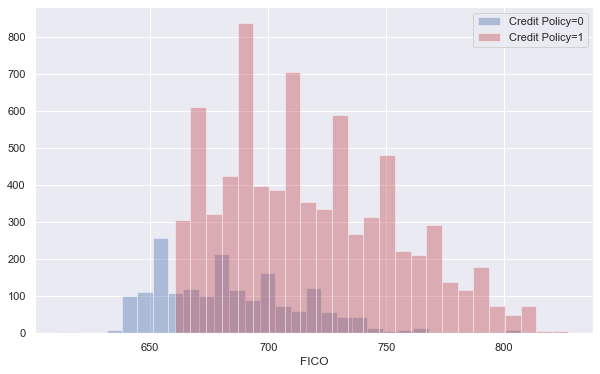

In [53]:
plt.figure(figsize=(10, 6))
x_zero = loans[loans['credit.policy']==0]['fico']
x_one = loans[loans['credit.policy']==1]['fico']
#x_one.hist(bins=30)
#x_zero.hist(bins=30)
sns.set(style='darkgrid')
plt.xlabel('FICO')
sns.distplot(x_zero, hist=True, bins=30, kde=False, color='b', axlabel=False, label='Credit Policy=0')
sns.distplot(x_one, hist=True, bins=30, kde=False, color='r', axlabel=False, label='Credit Policy=1')
plt.legend()

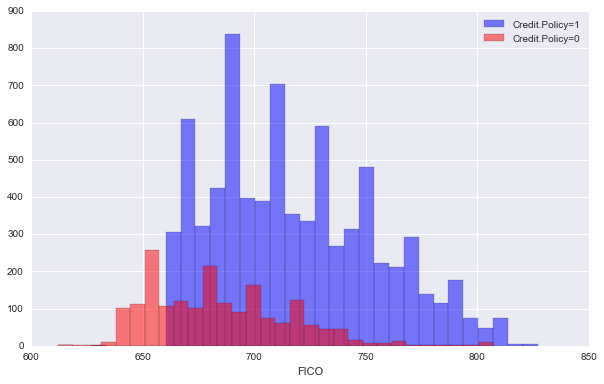

In [7]:
plt.figure(figsize=(10, 6))

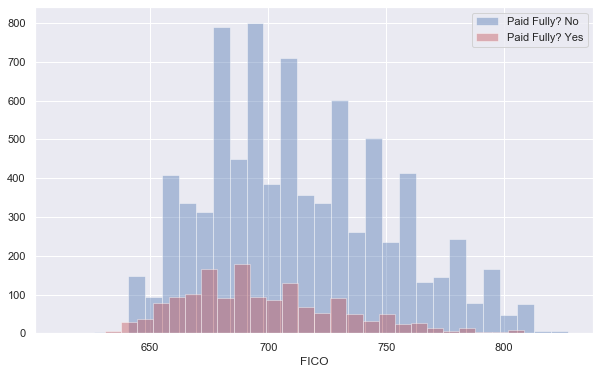

In [54]:
plt.figure(figsize=(10, 6))
x_zero = loans[loans['not.fully.paid']==0]['fico']
x_one = loans[loans['not.fully.paid']==1]['fico']
#x_one.hist(bins=30)
#x_zero.hist(bins=30)
sns.set(style='darkgrid')
plt.xlabel('FICO')
sns.distplot(x_zero, hist=True, bins=30, kde=False, color='b', axlabel=False, label='Paid Fully? No')
sns.distplot(x_one, hist=True, bins=30, kde=False, color='r', axlabel=False, label='Paid Fully? Yes')
plt.legend()

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

In [91]:
purpose = loans['purpose'].unique()#7 types
plt.figure(figsize=(10, 6))
i=0
while(i != 7):
    sns.countplot(loans[loans['purpose']==purpose[i]], hue=loans['not.fully.paid'])
    i = i+1

ValueError: could not broadcast input array from shape (3957,14) into shape (3957)

<Figure size 720x432 with 0 Axes>

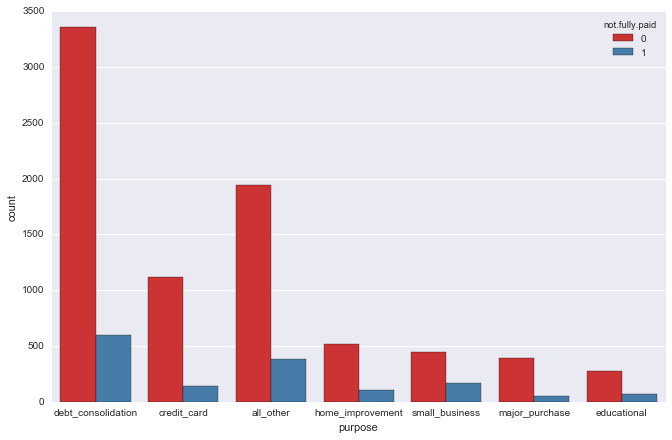

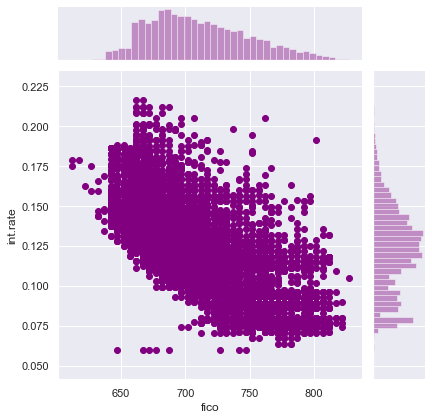

In [88]:
sns.jointplot(loans['fico'], loans['int.rate'], color='purple')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

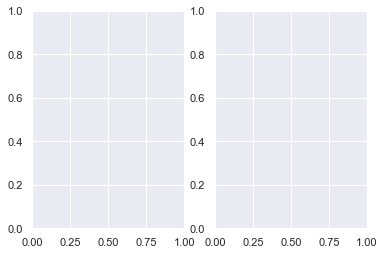

In [101]:
fig, axes = plt.subplots(ncols=2)
sns.lmplot(loans['fico'][loans['not.fully.paid']==0], loans['int.rate'][loans['not.fully.paid']==0], loans, hue=loans['credit.policy'], col_order=axes[0])
sns.lmplot(loans['fico'][loans['not.fully.paid']==1], loans['int.rate'][loans['not.fully.paid']==1], loans, hue=loans['credit.policy'], col_order=axes[1])

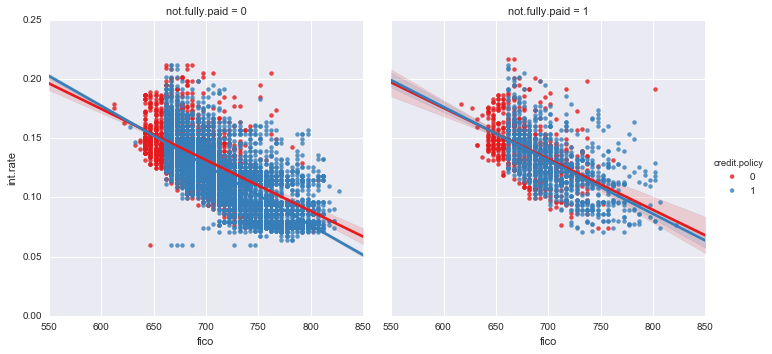

In [11]:
fig, axes = plt.subplots(n_cols=2)
sns.lmplot(loans['fico'], loans['not.fully.paid'], hue=loans['credit.policy'], ax=axes[0])

In [89]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [107]:
cat_purpose = ['purpose']

In [108]:
final_purpose = pd.get_dummies(loans, columns=cat_purpose, drop_first=True)
final_purpose

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [109]:
from sklearn.model_selection import train_test_splita

In [130]:
X_train, X_test, y_train, y_test = train_test_split(final_purpose.drop('not.fully.paid', axis=1), final_purpose['not.fully.paid'], test_size=0.3, random_state=42)

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
decision_tree = DecisionTreeClassifier()

In [131]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [132]:
tree_pred = decision_tree.predict(X_test)

In [119]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.73      2874



In [134]:
print(confusion_matrix(y_test, tree_pred))

[[1997  411]
 [ 366  100]]


In [135]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
forest = RandomForestClassifier(n_estimators=200)

In [136]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
forest_pr

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.56      0.01      0.02       443

avg / total       0.80      0.85      0.78      2874



[[2427    4]
 [ 438    5]]
